In [2]:
import sys
sys.path.append(".")
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
import matplotlib.pylab as plt
from pathlib import Path
from tensorflow.keras import layers
import datetime




In [3]:
Resnet50_Scratch52_history = np.load("Resnet50_Scratch52_history.npy",allow_pickle=True).item()


In [3]:
print(Resnet50_Scratch52_history)

{'loss': [3.9541451930999756, 3.2041122913360596, 2.5735859870910645, 2.104243040084839, 1.761033535003662, 1.457453727722168, 1.212977409362793, 1.0416103601455688, 0.8991407752037048, 0.7838033437728882, 0.6998999714851379, 0.6274693012237549, 0.5660029053688049, 0.5036349892616272, 0.47092512249946594, 0.43331900238990784, 0.4087922275066376, 0.3703019917011261, 0.3448379933834076, 0.32628563046455383, 0.308868408203125, 0.29648682475090027, 0.2787916362285614, 0.27316445112228394, 0.24755170941352844, 0.2508271038532257, 0.23419900238513947, 0.22726592421531677, 0.2107064127922058, 0.20239175856113434, 0.20356693863868713, 0.1995987743139267, 0.1871347725391388, 0.18319380283355713, 0.18031436204910278, 0.17045605182647705, 0.1660418063402176, 0.16050167381763458, 0.15427950024604797, 0.14623622596263885, 0.09710421413183212, 0.09853018075227737, 0.09445956349372864, 0.08558277785778046, 0.08533532917499542, 0.08741917461156845, 0.07932866364717484, 0.07593606412410736, 0.078185044

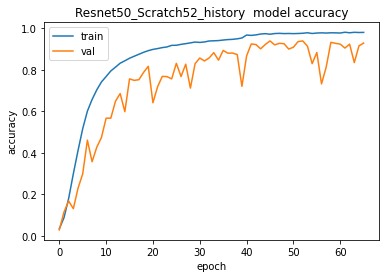

In [4]:
# summarize history for Resnet50_Scratch52_history accuracy
plt.plot(Resnet50_Scratch52_history['accuracy'])
plt.plot(Resnet50_Scratch52_history['val_accuracy'])
plt.title('Resnet50_Scratch52_history  model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
print(np.amax(Resnet50_Scratch52_history['accuracy']))
print(np.amax(Resnet50_Scratch52_history['val_accuracy']))

0.980442464351654
0.9386078119277954


In [7]:
len(Resnet50_Scratch52_history['accuracy'])

66

In [4]:
# Defining the model

trainable_flag = True
include_top_flag = False
weigths_value = 'imagenet'

if trainable_flag:
    include_top_flag = True
    weigths_value = None
else:
    include_top_flag = False
    weigths_value = 'imagenet'
   

In [5]:
img_height = 224 #B0
img_width = 224 #B0
bs = 16 # batch size
classes_names = ["2_clubs","2_diamonds","2_hearts","2_spades",\
               "3_clubs","3_diamonds","3_hearts","3_spades",\
               "4_clubs","4_diamonds","4_hearts","4_spades",\
               "5_clubs","5_diamonds","5_hearts","5_spades",\
               "6_clubs","6_diamonds","6_hearts","6_spades",\
               "7_clubs","7_diamonds","7_hearts","7_spades",\
               "8_clubs","8_diamonds","8_hearts","8_spades",\
               "9_clubs","9_diamonds","9_hearts","9_spades",\
               "10_clubs","10_diamonds","10_hearts","10_spades",\
               "ace_clubs","ace_diamonds","ace_hearts","ace_spades",\
               "jack_clubs","jack_diamonds","jack_hearts","jack_spades",\
               "king_clubs","king_diamonds","king_hearts","king_spades",\
               "queen_clubs","queen_diamonds","queen_hearts","queen_spades"]

In [6]:
base_model = tf.keras.applications.resnet50.ResNet50(
    weights=weigths_value,
    input_tensor=None,

    pooling=None,
    
    input_shape=(img_height, img_width, 3),
    include_top=include_top_flag,
    classes=len(classes_names) )

In [7]:
inputs = layers.Input(shape=(img_height,img_width,3))
outputs = base_model(inputs)
model = tf.keras.Model( inputs,  outputs)

model.load_weights('Resnet50_Scratch.h5')

In [8]:
testgen = ImageDataGenerator()
test_generator = testgen.flow_from_directory(

    directory = 'dataset_test',
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    shuffle=False,
    #subset='validation',
    interpolation="nearest",
    classes=classes_names) # set as validation data
filenames = test_generator.filenames
nb_samples = len(filenames)

Found 7794 images belonging to 52 classes.


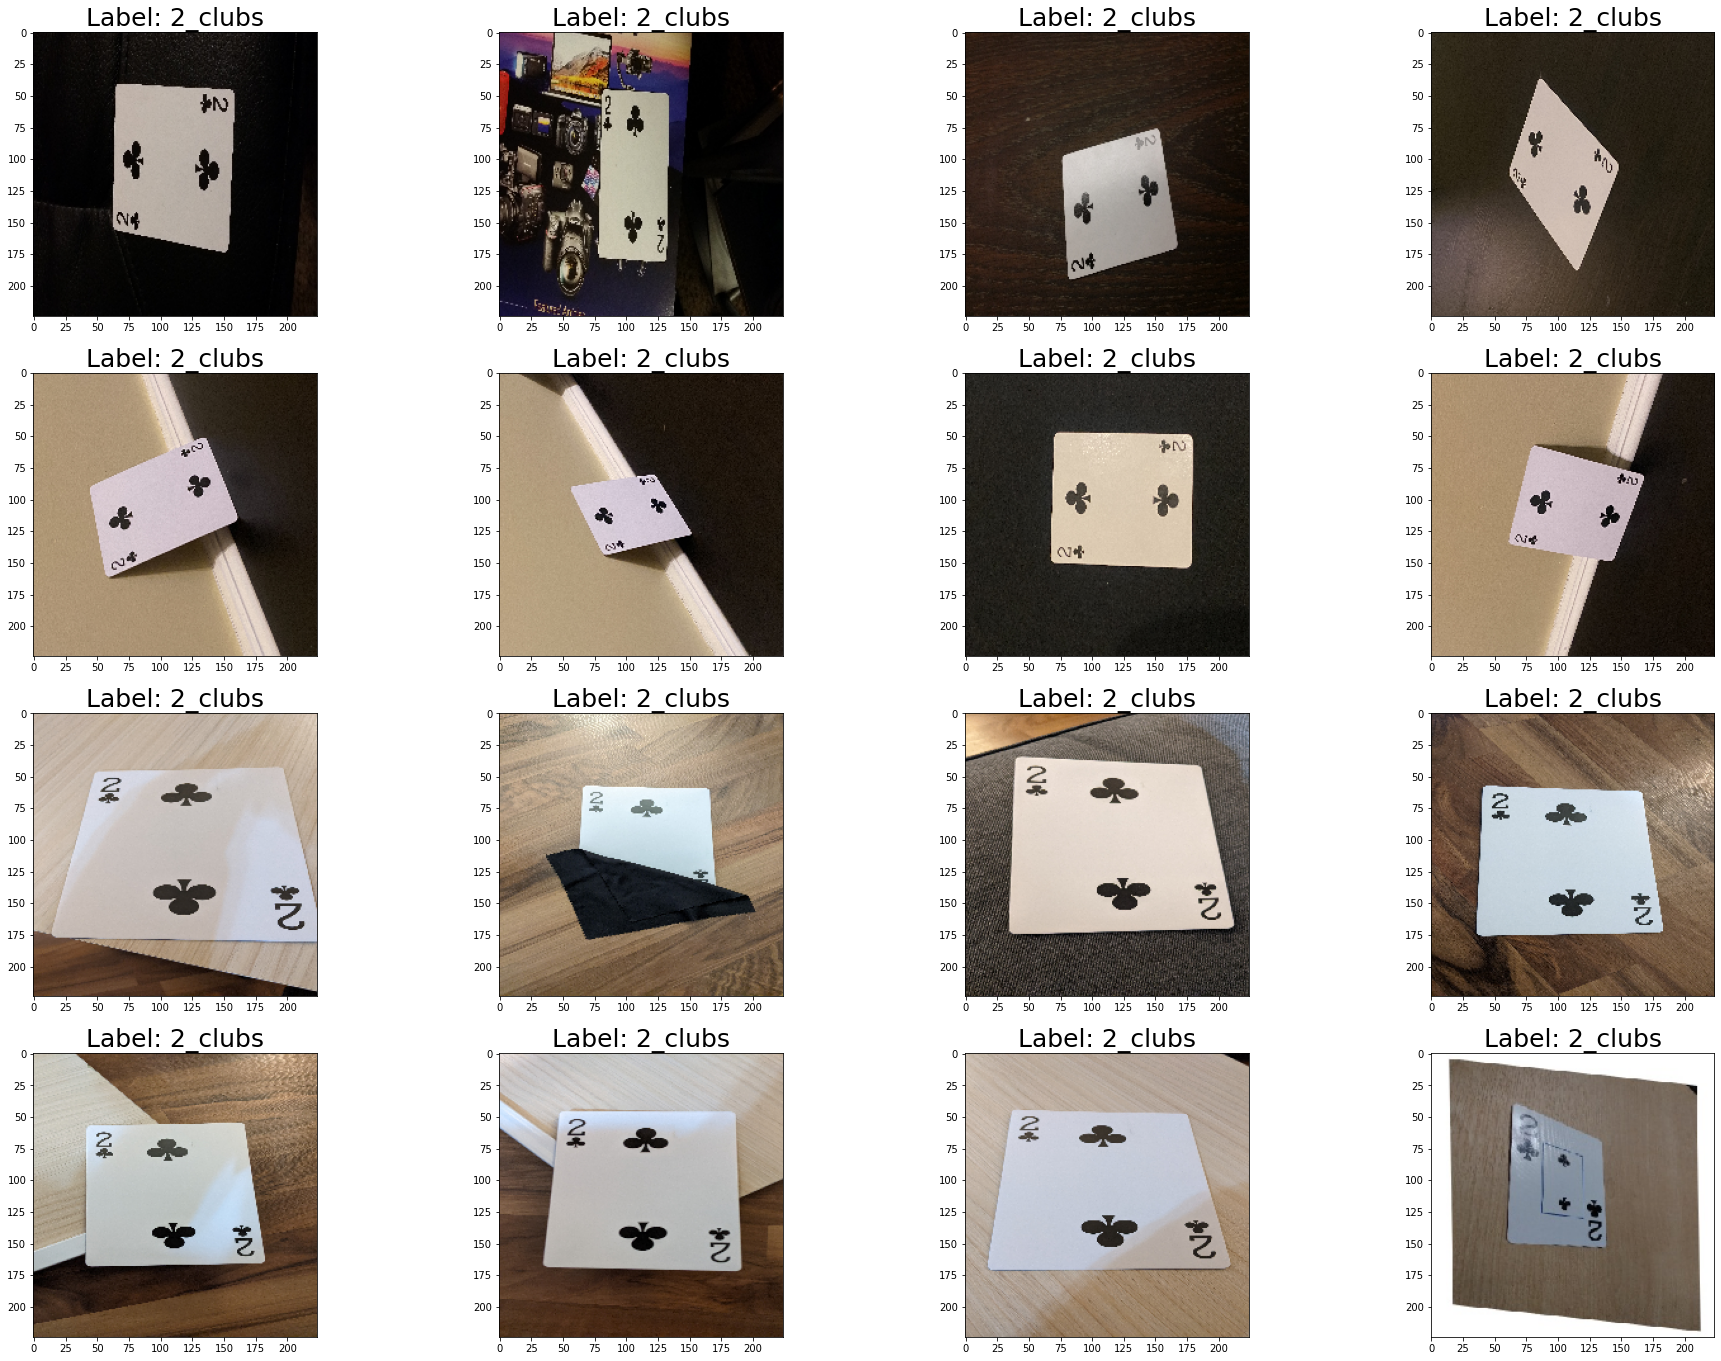

In [25]:
plt.figure(figsize = (32,24))
Xbatch,Ybatch = test_generator.__getitem__(1)

for ii in range(int(bs)):
    plt.subplot(4,4,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    class_idx = int(Ybatch[ii].argmax())
    plt.title("Label: {}".format(classes_names[class_idx]), fontsize=25)
plt.show()

In [26]:
predict = model.predict(test_generator, verbose = 1)

488/488 [==============================] - 794s 2s/step


In [27]:
import pandas as pd
pred_value = np.max(predict,axis = 1)
pred_idx = (np.argmax(predict,axis = 1)).astype(int).transpose()
pred_class = [classes_names[i] for i in pred_idx]
df = pd.DataFrame(data=pred_idx,columns= ['idx'])
df['pred_class'] = pred_class
df['pred_value'] =  pred_value
df['file_name'] = filenames
df.head()

,idx,pred_class,pred_value,file_name
0,4,3_clubs,0.821300,2_clubs\2C.png
1,0,2_clubs,0.999974,2_clubs\C21.jpg
2,0,2_clubs,0.973730,2_clubs\C210.jpg
3,0,2_clubs,0.997864,2_clubs\C22.jpg
4,0,2_clubs,0.572789,2_clubs\C25.jpg


In [28]:
df.to_csv('dataset_new_test.csv', index=True)

#Single image test


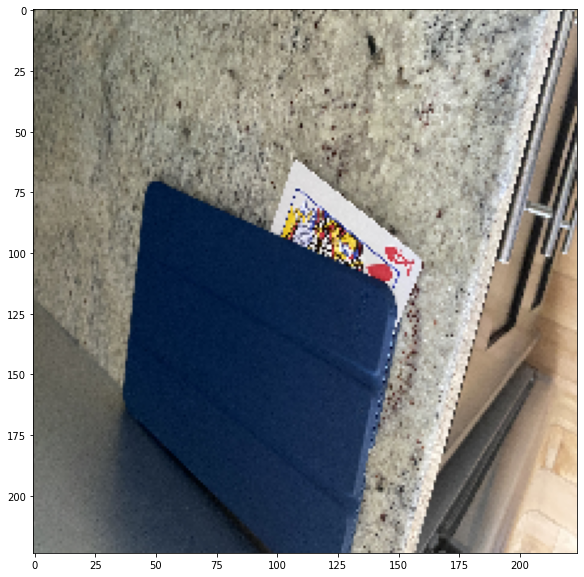

In [31]:
from keras.preprocessing import image
img_path  = "dataset_test_hard/king_hearts/IMG_7008.jpg"
#img_path  = "unknown.png"

img = image.load_img(img_path, target_size=(img_width, img_height))
plt.figure(figsize = (10,10))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [32]:
pred = model.predict(images, batch_size=10, verbose =1)
print('Predicted card:',classes_names[np.argmax(pred)])
print('certainty', pred[0][np.argmax(pred)]*100,"%")

1/1 [==============================] - 1s 1s/step
Predicted card: jack_clubs
certainty 95.2396810054779 %


In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), #1e-4
              loss='categorical_crossentropy',
              metrics=['accuracy'])
eval = model.evaluate(test_generator, verbose = 1)

488/488 [==============================] - 822s 2s/step - loss: 0.2728 - accuracy: 0.9533


In [9]:


test_generator_hard = testgen.flow_from_directory(

    directory = 'dataset_test_hard',
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    shuffle=False,
    #subset='validation',
    interpolation="nearest",
    classes=classes_names) # set as validation data



Found 231 images belonging to 52 classes.


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), #1e-4
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
eval = model.evaluate(test_generator_hard, verbose = 1)

15/15 [==============================] - 35s 2s/step - loss: 8.4768 - accuracy: 0.3030


In [12]:
test_generator_easy = testgen.flow_from_directory(

    directory = 'dataset_test_easy',
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    shuffle=False,
    #subset='validation',
    interpolation="nearest",
    classes=classes_names) # set as validation data



Found 208 images belonging to 52 classes.


In [13]:
eval = model.evaluate(test_generator_easy, verbose = 1)

13/13 [==============================] - 19s 1s/step - loss: 0.1259 - accuracy: 0.9615
